In [27]:
import qrcode
import hashlib
import os
import sys
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont


In [28]:

imgs = []
datas = []
stuff = {"1":"bK6wrDtiQz9-pqgL_HC6GRCp_456ApDbGCaqK6wENj4",
"2":"ST1Iyh9NFpZIyG1SQv35Grfdh96Vxmj4-OMd0EPNcmI",
"3":"6HpcqteP6713AARjNG3uO8uhOjYgSfmh38XRc9Xo2N0",
"25":"UulAi1fk8_QII7UjHdWzPI-eAIg1rFyklU7sUF8Yhw8",
"26":"4QtAGGQlvhiSsHWCNb_dB5DaszYgia-il2lkULK8is0",
"27":"FCZueS9C_0f8ntub1f9R4NV8ZU5JLBXYP5YWvcosQPQ",
"29":"s2nrQiIRw7OAUHSOKPPhU8svac0rznzz1BhDdl9Pjhc",
"30":"RA0lZ8PVWgGW3hrP9dTNWRrDXydKs_zcCfjLh-tYia8",
"38":"Mb1njzSufiQ0Yq8KMYlelGGNKHXWbFN-IwFYhj7EQrA",
"39":"ijsifI7K5eZrs2s92P3PVeW6_5yZ-1dZuc4jnXHGZA4",
"40":"s4rt7ogp-zt6hUCvsTtklpnbEbegs78o0OsvsswgLF8",
"41":"DDz5QThvgMBMLan9HMn-Axoc-iIsDaBT90U6Xsap6K0",
"42":"ARz8Oa7-zA-B3SvBEMCoLvFt7nH_njz5mZNhHs8c2B0",
"43":"AUSTsdKhFQ7flWGRh7F5yVgnHwl_jlKiWklWwtiKBvc",
"46":"NqCwr8SgwhHDrvJt90WW0wD418I0gP_kDbKpB6t0FC4",
"47":"a2IPvd_G2Ft72HVDqi91FjgVhQ4yYxjCM2U38h7X6fI",
"48":"11pxyP7uqel7UvjlGEMYhRwSSKZIf93fn9foOaSft38",
"50":"TGOGC3XcsRG0Q3VTnjq0bPUq_k9yQYUNVPU8X41xQxI",
"52":"MAi5zyAUqI-YspQTmAwqhqJevmLxd3GWgH1EYCFx894",
"69":"obju8sO6Pv0mUGLh32i2SpHdvq1SZM3Cd3T7QP_Byuk",
"70":"wcme3Wj3JGu91ecqfFEuPTr0qDForouKbaG_SD6PTOY",
"71":"3lHN68paTCWQ5iaILo3LVSnoLosYFhF9u6E4tUZmwFk",
"73":"rf_EMy3dbBzjR2B-Onw20MRXNJQwjnp8M6pneY0FPDM",
"74":"DzdfCY6h8-o4zJ0F8bQgDIGPJ2L6kMaAkmJF9Q_9US8",
"76":"0WN3nZQkOXZ2wdE0k078nP7YozKz56u50jdhI2lA-Cs",
"77":"kUJfrbS7fQmBAzUvawB9eSbMKcYbZfZYGpe2lCHnlno",
"79":"Xlk-6fP2rqsBnfiB9O4AOCzJm13UWDUM1H9-0zuOv2M",
"80":"J2otjAMpSX0Xed88vbbce-C6RA8VmFoBLwRbTeE_usY",
"81":"A88CVUkoBfzzCbw-83WzwsrDsf5sxS1ovKpv_u8g1f0",
"82":"s7E0O_dULST4fEUcVVByeSwMun9S8T-AWnGcC5sfbm4",
"83":"O6_phmTi7R93SVkXqkls-3llOIbgZeGBR5xAxigzmOg",
"84":"0a2IXNb46vv8KDw5QXdZId8iyr7upjm-x9Q7KEaFfM8",
"85":"132vZkceuDXWVGALSast8kZ-Bv7hvxZOiSe8PuD4_Bg",
"89":"we0DtMHpIZxdf9uo32E1km9juGGjG97pel9bteUk9kE",
"90":"hAeFrYMAUafzKSOATzwIxJKNtv7qpFTCEW1QCOCjaXA",
"91":"JH4Fi2f4x6-n8lh_K1KvrLP8LWll8E4oKMvVdg8QJDA",
"93":"8P0VsA3k1PiFAMQwjwqJ2yC0UKRw4m-Y_VKf_9JT8es",
"100":"08fo9qa688hFWfOfXEmSrVhlo2YbkofHnnpsEbtz7Vo",
"101":"LVV45_Xe2oNzdXOOO2RzSB-XuvdaXZMVsBTe1_1Go-4",
"102":"PiI12pP7qqq-TnA8UNOfPvbuEcfkdzDEwoc2ewQsq1o",
"103":"JQv5UXg-ITNm9lW7p-8kFUeaHYDogdVUEUdFV4t6jas",
"104":"4mTPx-oLyElbOOSWp50c4BzATXaD8WTekr0FywUe9rQ",
"105":"yNi8xQYylV9bq7C-gyOG3dMQbyA3ovFCv6wDy8Z8fA4",
"106":"6e1rZk8lIBDTlbrWaeAxYeyM1lm1aW_L2WlKSoMO8Hc",
"109":"fZxD9AHwXR1864P2XIssN18KZMKd7LxclTem65Ka8Rs",
"111":"YH-yAonXQ3Wly59SI9AnsN-uk-Ko44Id2dY6f5XvsoA",
"112":"Vcrutkyx-ZNFsRuFz2Kbtuuty02KRazc9J_8v8smAxQ",
"113":"1LSpubfQ1JBZZgHDDcen5QXCxG91OoZvvYO0EdEGMl4",
"114":"hhLb_xehy61Z7_nZhTxOJ79B7GwT6LA55rZuw5Y-SGk",
"115":"EAuIkjuIVQ_nE2a3P7PHpJAihj92gWVhAowlIfLfgAg",
"116":"YiP7iid_fEYP1bkqt-Oe7ZRemBcxfbi_TG0_iar-104",
"118":"EZUVeOXRxDrYMBD0u5Jgsv5VDkqXeUFPLtz1kCeUs6g",
"119":"fVf8gH3HJEdWEIm1ZmKpKbK24nekFgwUCFMq2kyfHQ4",
"120":"g5i2-rJF1yg7UJfR_omc3yUE0801PTOrsPZDGTH9kCU",
"122":"46YSRJKv8sq77x0Cm9dfYbD4DIya3zDd8Tec_3-qezs",
"124":"EnI11nuucqaQMSgWyE6wqZWU3QXMT4SklY6EJfBr6us",
"125":"NJKxKLXr1nsyVFQ1-ZJ0wCDWk-kSB3w9_iW8l8Th9A0",
"126":"QvATlv2o4-wcW15Lp62H2PlYMO95zKvxXZdXLRwUUDY",
"128":"7nedF8JZclE55Uxxcv5zVi39hGNHtBP1OCeSV7EO_Ng",
"131":"5M0MJMkoeartV6nIlvl6S_UBtjo_wsHX75oqUYLMYYQ",
"132":"dePEJWEmo751wz5fYGBr_4u8G6MicYbfmOejMCdCR4o",}
for i in stuff:
    qr = qrcode.QRCode(
        version=1,
        error_correction=qrcode.constants.ERROR_CORRECT_M,
        box_size=10,
        border=4,
    )

    data = "scpbooks.org/checkout/" + stuff[i]
    qr.add_data(data=data)
    qr.make(fit=True)
    img = qr.make_image(fill_color="black", back_color="white")
    # add text on the image
    
    thing = ImageDraw.Draw(img);
    myFont = ImageFont.truetype('FiraCode-Regular.ttf', 25)
    thing.text((0, 0), i, font=myFont, fill="black")
    
    img.save(i + ".png")
    
    
    imgs.append(img)
    datas.append(data)


scpbooks.org/checkout/bK6wrDtiQz9-pqgL_HC6GRCp_456ApDbGCaqK6wENj4


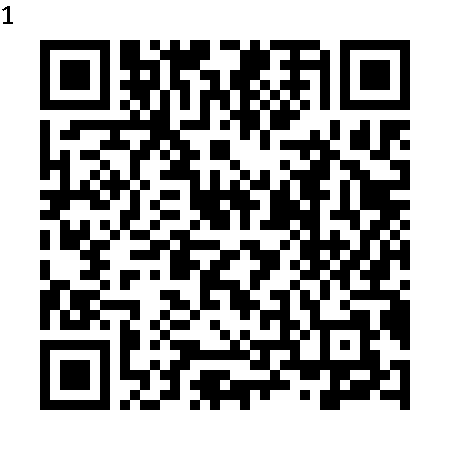

scpbooks.org/checkout/ST1Iyh9NFpZIyG1SQv35Grfdh96Vxmj4-OMd0EPNcmI


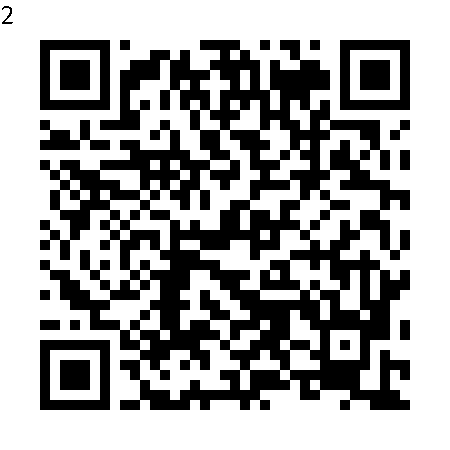

scpbooks.org/checkout/6HpcqteP6713AARjNG3uO8uhOjYgSfmh38XRc9Xo2N0


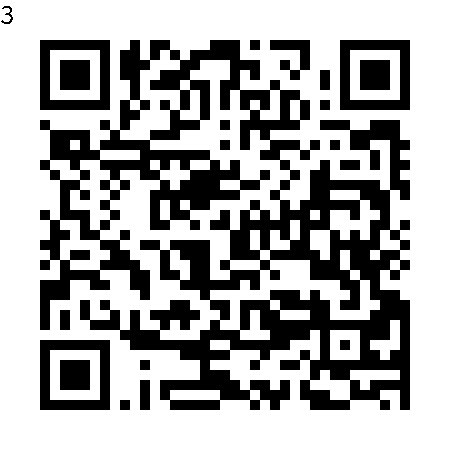

scpbooks.org/checkout/UulAi1fk8_QII7UjHdWzPI-eAIg1rFyklU7sUF8Yhw8


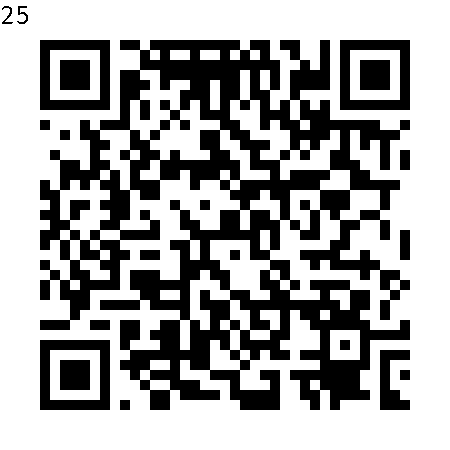

scpbooks.org/checkout/4QtAGGQlvhiSsHWCNb_dB5DaszYgia-il2lkULK8is0


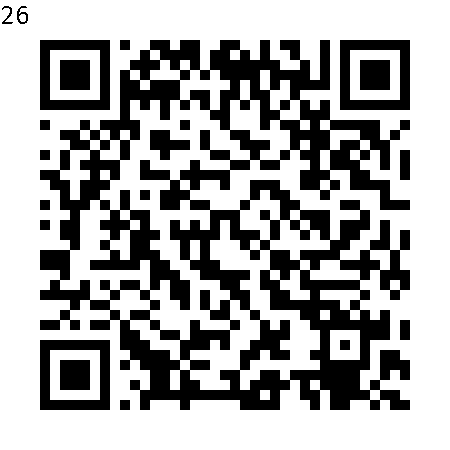

scpbooks.org/checkout/FCZueS9C_0f8ntub1f9R4NV8ZU5JLBXYP5YWvcosQPQ


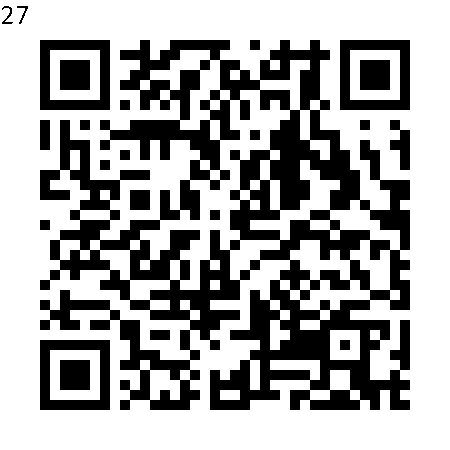

scpbooks.org/checkout/s2nrQiIRw7OAUHSOKPPhU8svac0rznzz1BhDdl9Pjhc


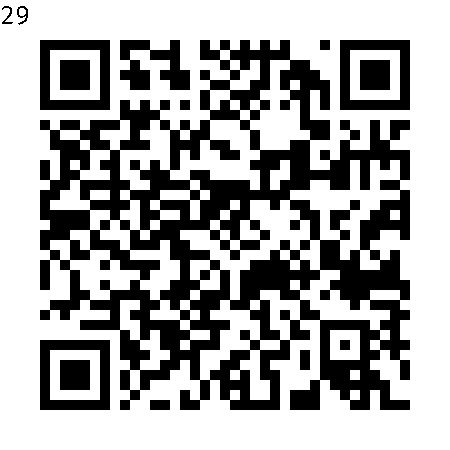

scpbooks.org/checkout/RA0lZ8PVWgGW3hrP9dTNWRrDXydKs_zcCfjLh-tYia8


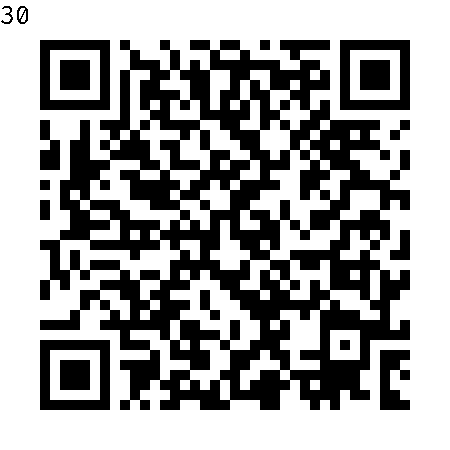

scpbooks.org/checkout/Mb1njzSufiQ0Yq8KMYlelGGNKHXWbFN-IwFYhj7EQrA


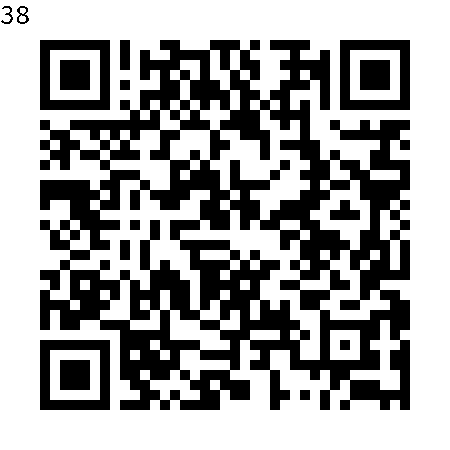

scpbooks.org/checkout/ijsifI7K5eZrs2s92P3PVeW6_5yZ-1dZuc4jnXHGZA4


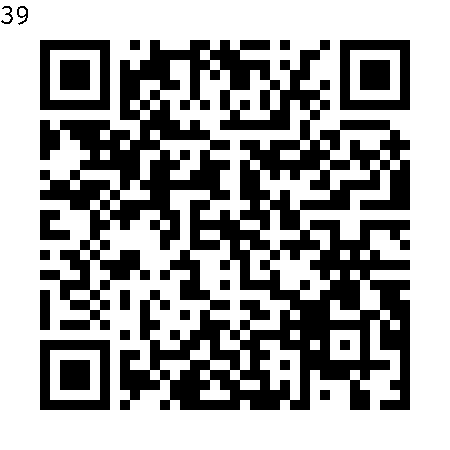

scpbooks.org/checkout/s4rt7ogp-zt6hUCvsTtklpnbEbegs78o0OsvsswgLF8


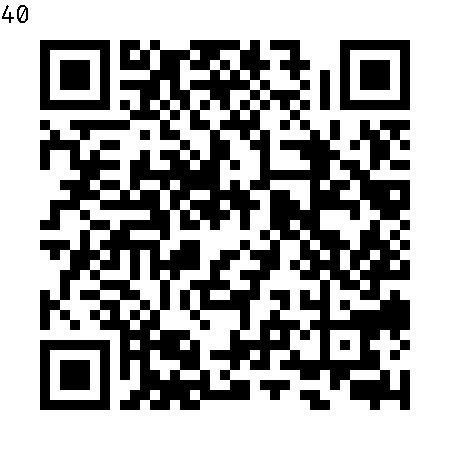

scpbooks.org/checkout/DDz5QThvgMBMLan9HMn-Axoc-iIsDaBT90U6Xsap6K0


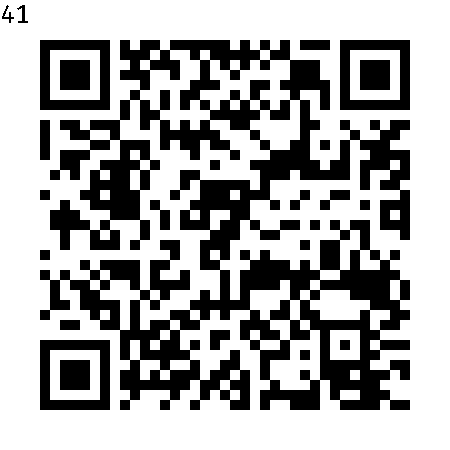

scpbooks.org/checkout/ARz8Oa7-zA-B3SvBEMCoLvFt7nH_njz5mZNhHs8c2B0


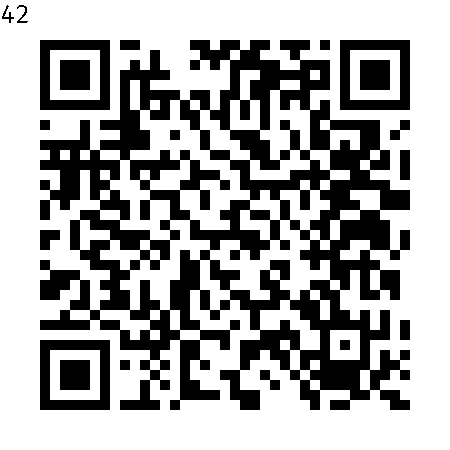

scpbooks.org/checkout/AUSTsdKhFQ7flWGRh7F5yVgnHwl_jlKiWklWwtiKBvc


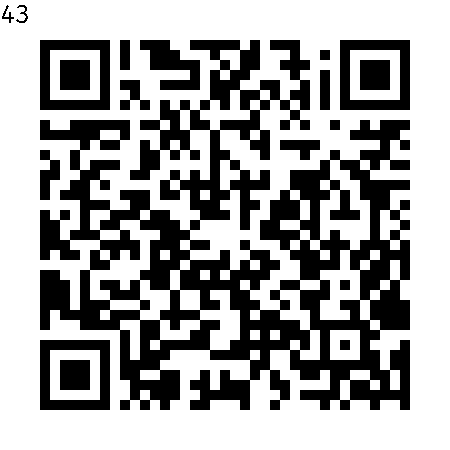

scpbooks.org/checkout/NqCwr8SgwhHDrvJt90WW0wD418I0gP_kDbKpB6t0FC4


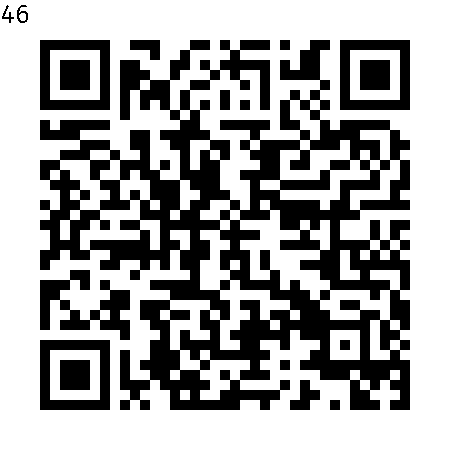

scpbooks.org/checkout/a2IPvd_G2Ft72HVDqi91FjgVhQ4yYxjCM2U38h7X6fI


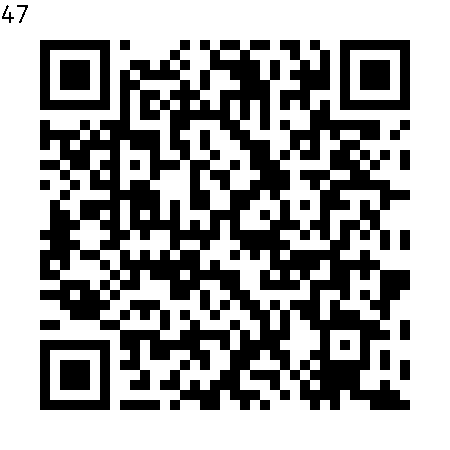

scpbooks.org/checkout/11pxyP7uqel7UvjlGEMYhRwSSKZIf93fn9foOaSft38


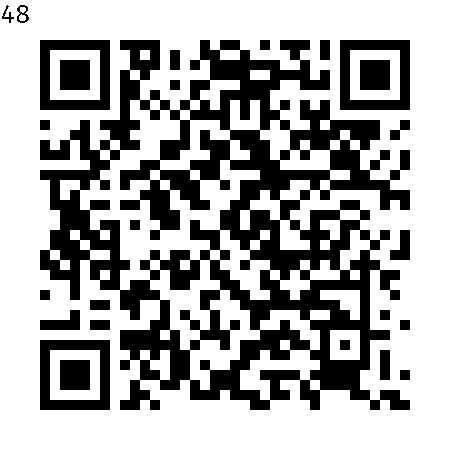

scpbooks.org/checkout/TGOGC3XcsRG0Q3VTnjq0bPUq_k9yQYUNVPU8X41xQxI


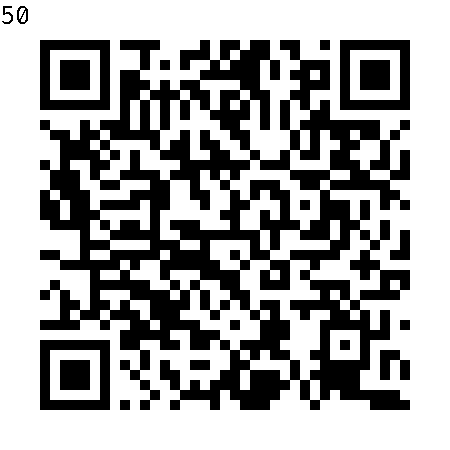

scpbooks.org/checkout/MAi5zyAUqI-YspQTmAwqhqJevmLxd3GWgH1EYCFx894


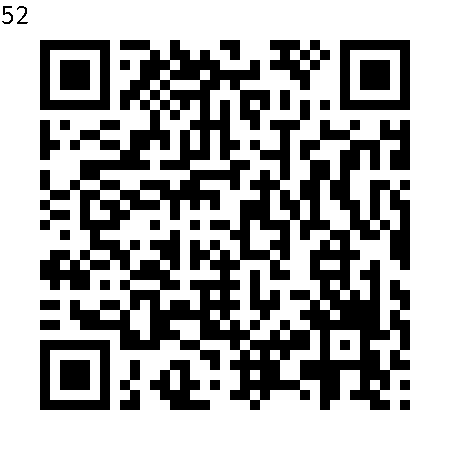

scpbooks.org/checkout/obju8sO6Pv0mUGLh32i2SpHdvq1SZM3Cd3T7QP_Byuk


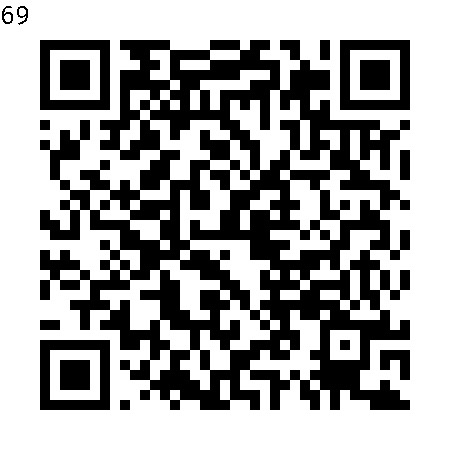

scpbooks.org/checkout/wcme3Wj3JGu91ecqfFEuPTr0qDForouKbaG_SD6PTOY


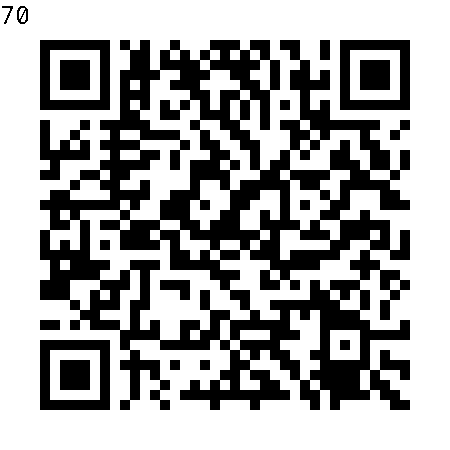

scpbooks.org/checkout/3lHN68paTCWQ5iaILo3LVSnoLosYFhF9u6E4tUZmwFk


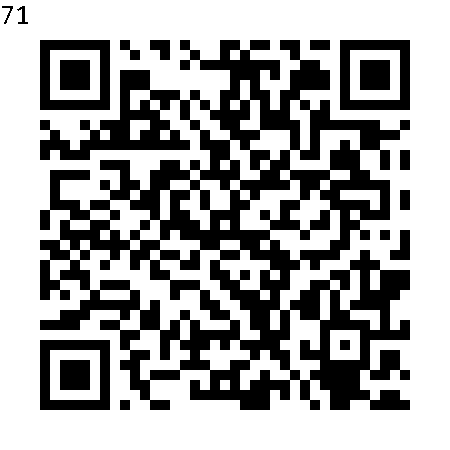

scpbooks.org/checkout/rf_EMy3dbBzjR2B-Onw20MRXNJQwjnp8M6pneY0FPDM


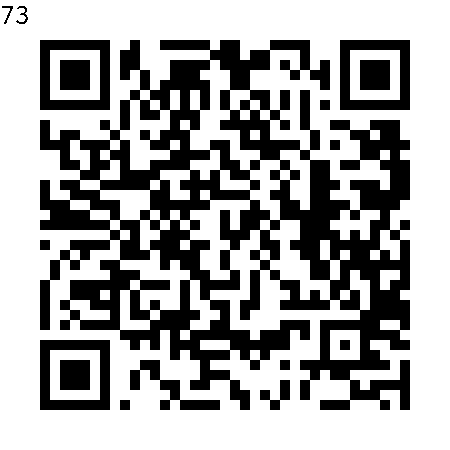

scpbooks.org/checkout/DzdfCY6h8-o4zJ0F8bQgDIGPJ2L6kMaAkmJF9Q_9US8


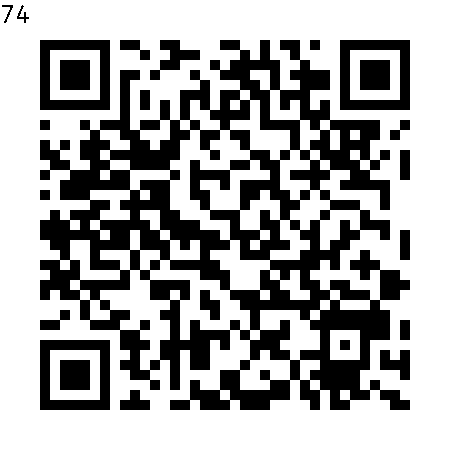

scpbooks.org/checkout/0WN3nZQkOXZ2wdE0k078nP7YozKz56u50jdhI2lA-Cs


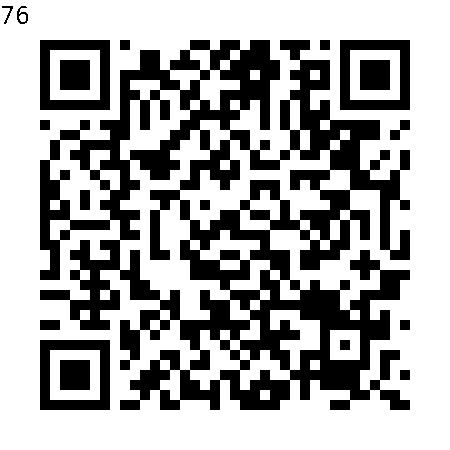

scpbooks.org/checkout/kUJfrbS7fQmBAzUvawB9eSbMKcYbZfZYGpe2lCHnlno


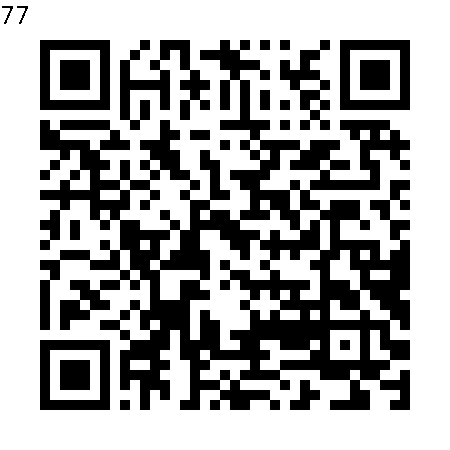

scpbooks.org/checkout/Xlk-6fP2rqsBnfiB9O4AOCzJm13UWDUM1H9-0zuOv2M


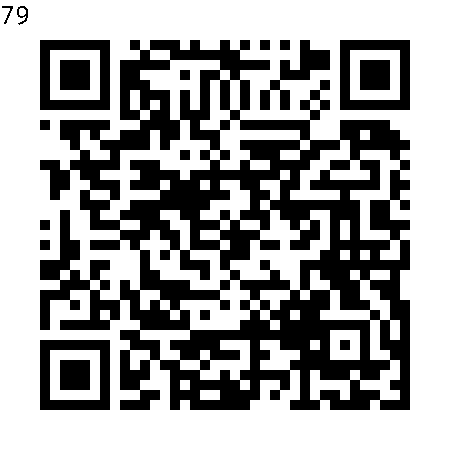

scpbooks.org/checkout/J2otjAMpSX0Xed88vbbce-C6RA8VmFoBLwRbTeE_usY


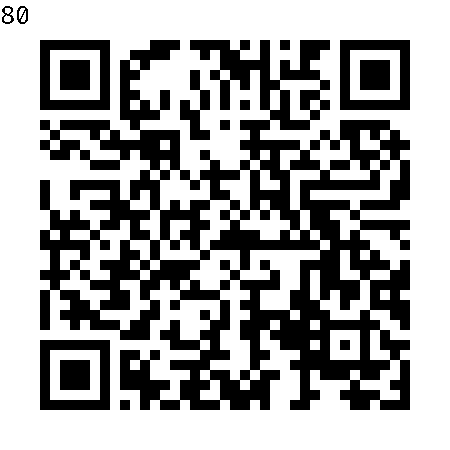

scpbooks.org/checkout/A88CVUkoBfzzCbw-83WzwsrDsf5sxS1ovKpv_u8g1f0


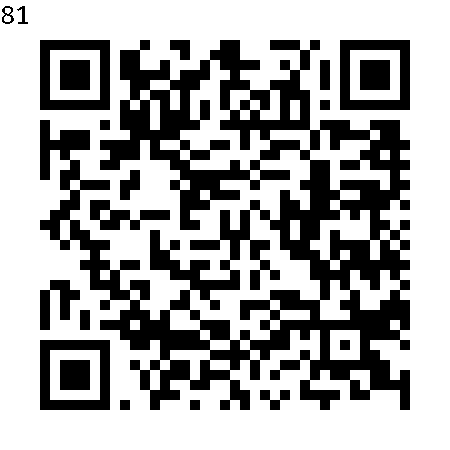

scpbooks.org/checkout/s7E0O_dULST4fEUcVVByeSwMun9S8T-AWnGcC5sfbm4


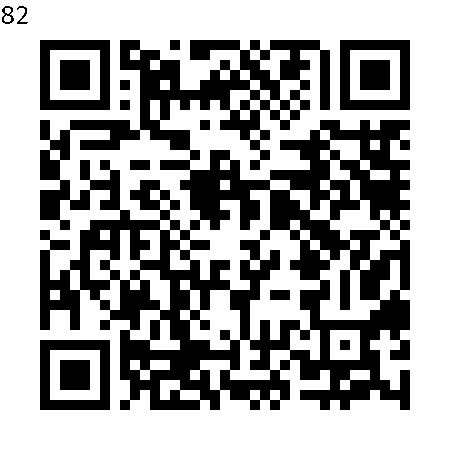

scpbooks.org/checkout/O6_phmTi7R93SVkXqkls-3llOIbgZeGBR5xAxigzmOg


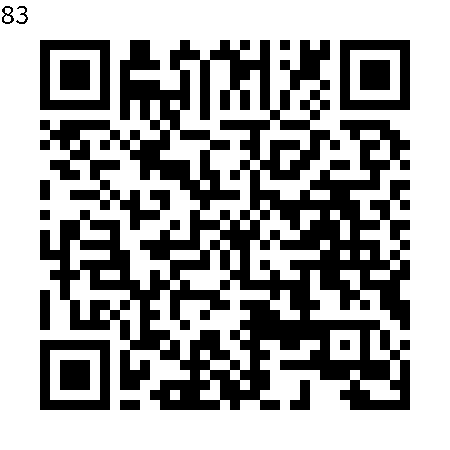

scpbooks.org/checkout/0a2IXNb46vv8KDw5QXdZId8iyr7upjm-x9Q7KEaFfM8


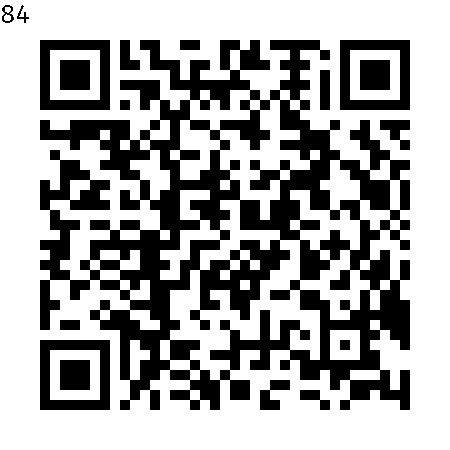

scpbooks.org/checkout/132vZkceuDXWVGALSast8kZ-Bv7hvxZOiSe8PuD4_Bg


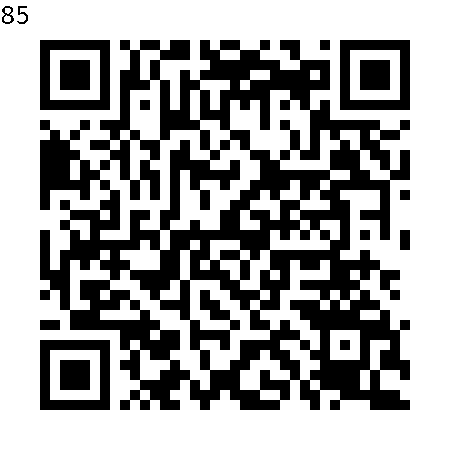

scpbooks.org/checkout/we0DtMHpIZxdf9uo32E1km9juGGjG97pel9bteUk9kE


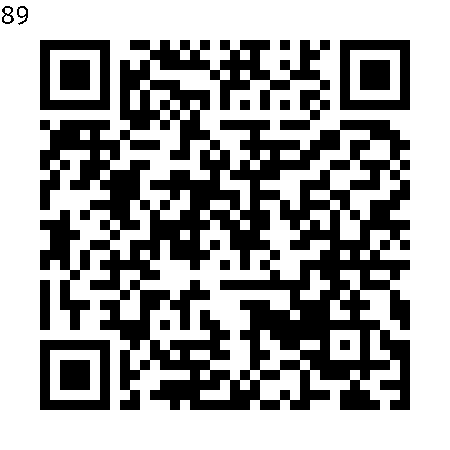

scpbooks.org/checkout/hAeFrYMAUafzKSOATzwIxJKNtv7qpFTCEW1QCOCjaXA


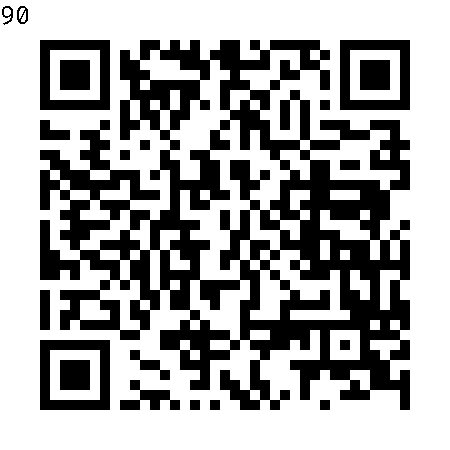

scpbooks.org/checkout/JH4Fi2f4x6-n8lh_K1KvrLP8LWll8E4oKMvVdg8QJDA


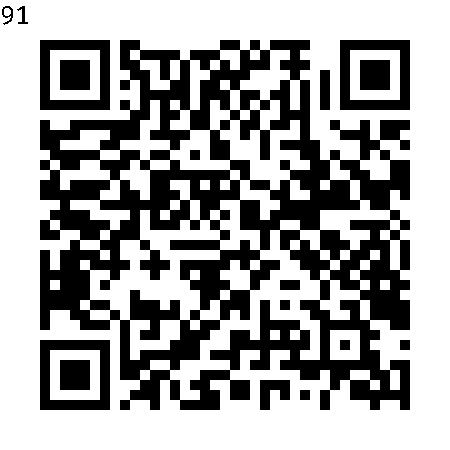

scpbooks.org/checkout/8P0VsA3k1PiFAMQwjwqJ2yC0UKRw4m-Y_VKf_9JT8es


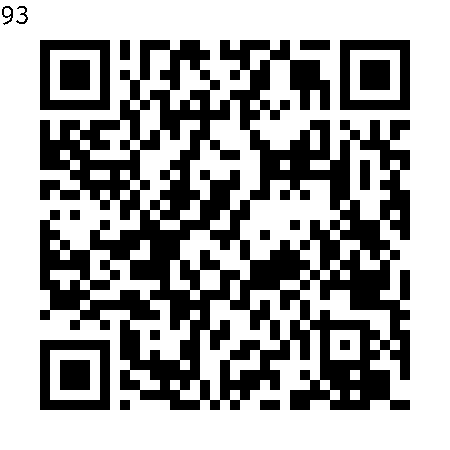

scpbooks.org/checkout/08fo9qa688hFWfOfXEmSrVhlo2YbkofHnnpsEbtz7Vo


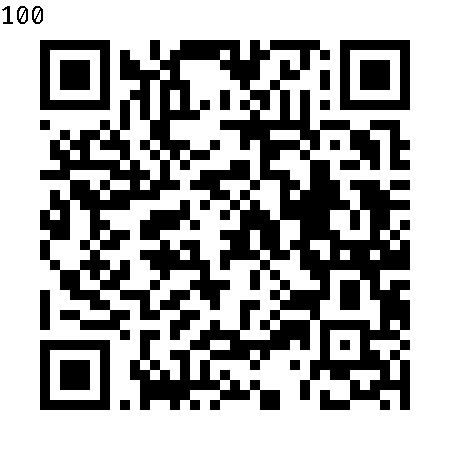

scpbooks.org/checkout/LVV45_Xe2oNzdXOOO2RzSB-XuvdaXZMVsBTe1_1Go-4


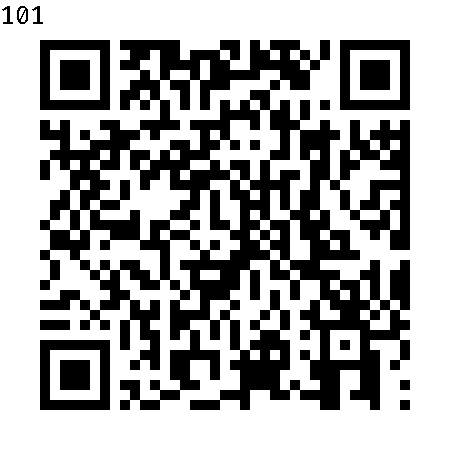

scpbooks.org/checkout/PiI12pP7qqq-TnA8UNOfPvbuEcfkdzDEwoc2ewQsq1o


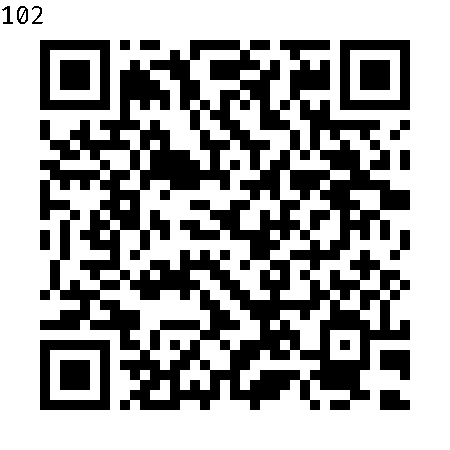

scpbooks.org/checkout/JQv5UXg-ITNm9lW7p-8kFUeaHYDogdVUEUdFV4t6jas


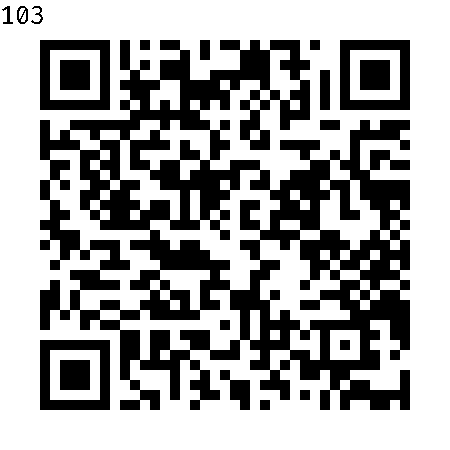

scpbooks.org/checkout/4mTPx-oLyElbOOSWp50c4BzATXaD8WTekr0FywUe9rQ


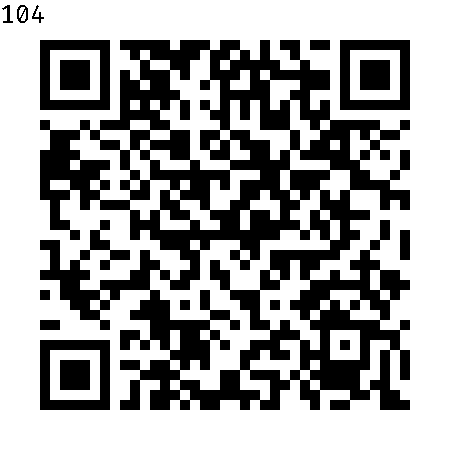

scpbooks.org/checkout/yNi8xQYylV9bq7C-gyOG3dMQbyA3ovFCv6wDy8Z8fA4


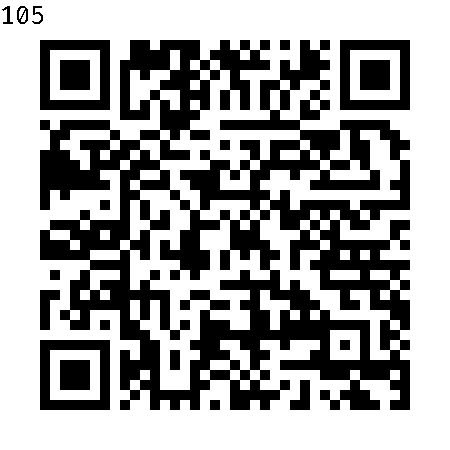

scpbooks.org/checkout/6e1rZk8lIBDTlbrWaeAxYeyM1lm1aW_L2WlKSoMO8Hc


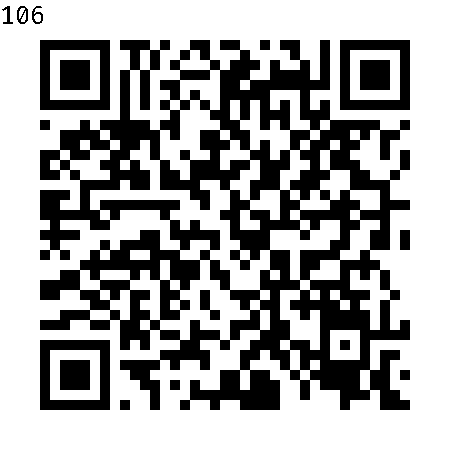

scpbooks.org/checkout/fZxD9AHwXR1864P2XIssN18KZMKd7LxclTem65Ka8Rs


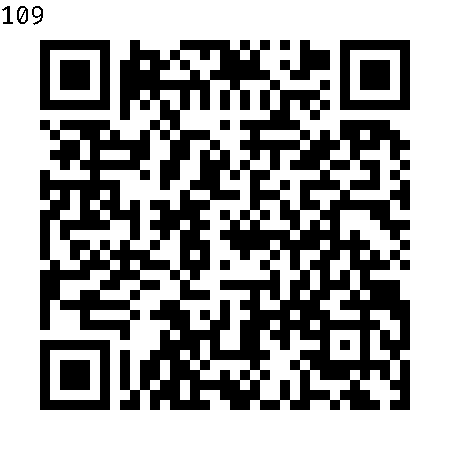

scpbooks.org/checkout/YH-yAonXQ3Wly59SI9AnsN-uk-Ko44Id2dY6f5XvsoA


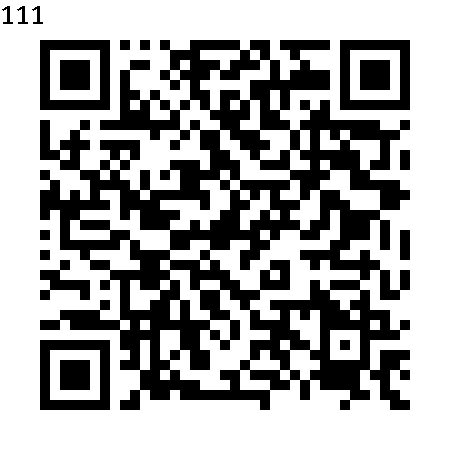

scpbooks.org/checkout/Vcrutkyx-ZNFsRuFz2Kbtuuty02KRazc9J_8v8smAxQ


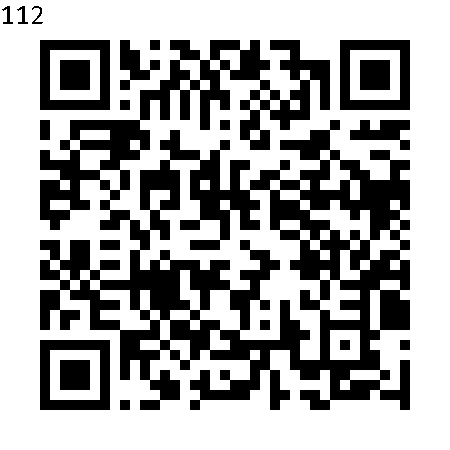

scpbooks.org/checkout/1LSpubfQ1JBZZgHDDcen5QXCxG91OoZvvYO0EdEGMl4


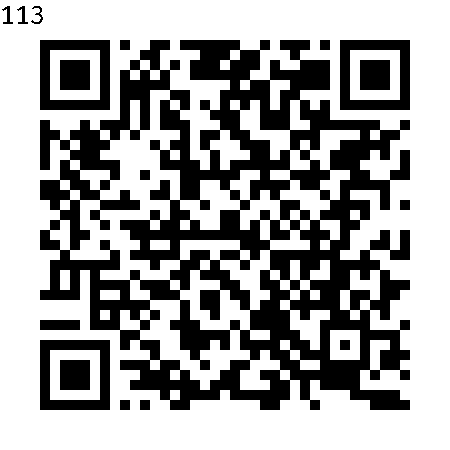

scpbooks.org/checkout/hhLb_xehy61Z7_nZhTxOJ79B7GwT6LA55rZuw5Y-SGk


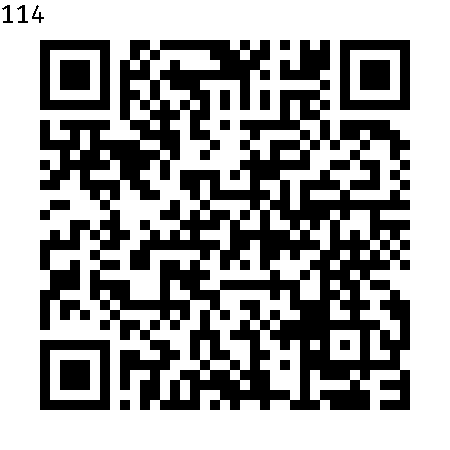

scpbooks.org/checkout/EAuIkjuIVQ_nE2a3P7PHpJAihj92gWVhAowlIfLfgAg


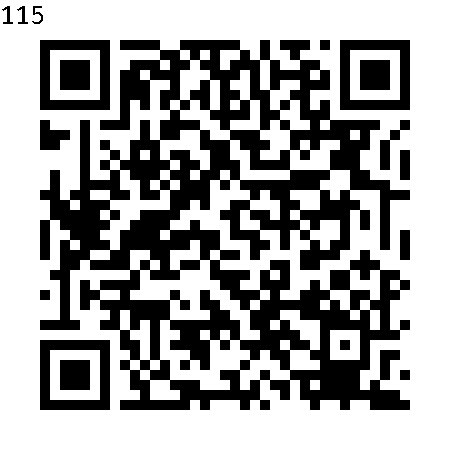

scpbooks.org/checkout/YiP7iid_fEYP1bkqt-Oe7ZRemBcxfbi_TG0_iar-104


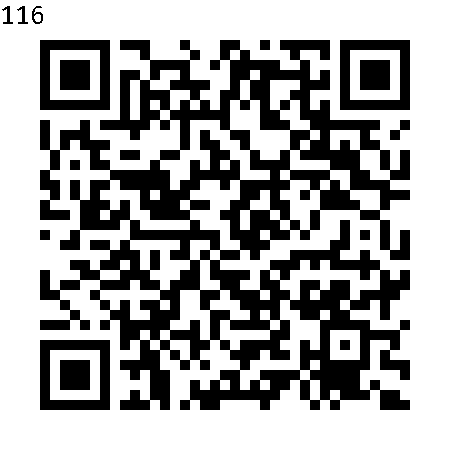

scpbooks.org/checkout/EZUVeOXRxDrYMBD0u5Jgsv5VDkqXeUFPLtz1kCeUs6g


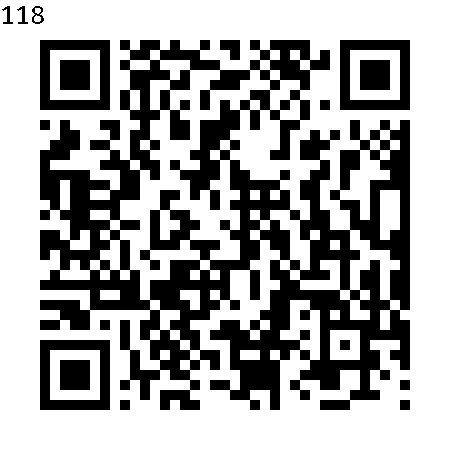

scpbooks.org/checkout/fVf8gH3HJEdWEIm1ZmKpKbK24nekFgwUCFMq2kyfHQ4


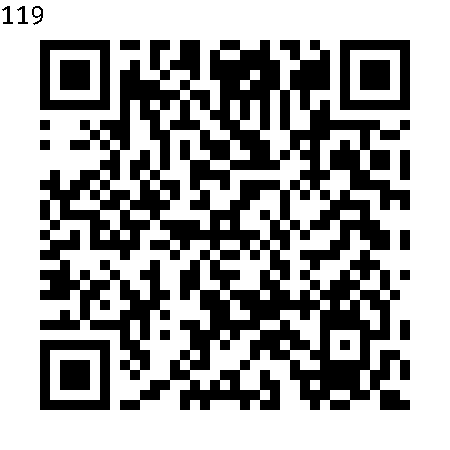

scpbooks.org/checkout/g5i2-rJF1yg7UJfR_omc3yUE0801PTOrsPZDGTH9kCU


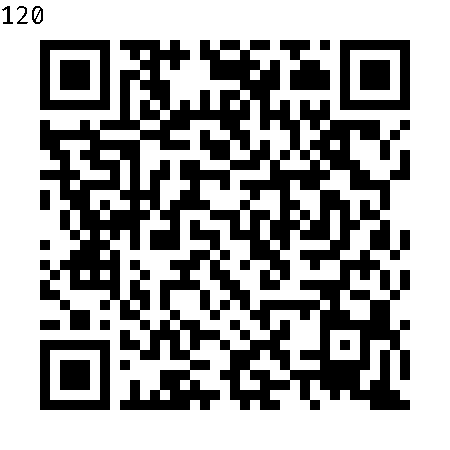

scpbooks.org/checkout/46YSRJKv8sq77x0Cm9dfYbD4DIya3zDd8Tec_3-qezs


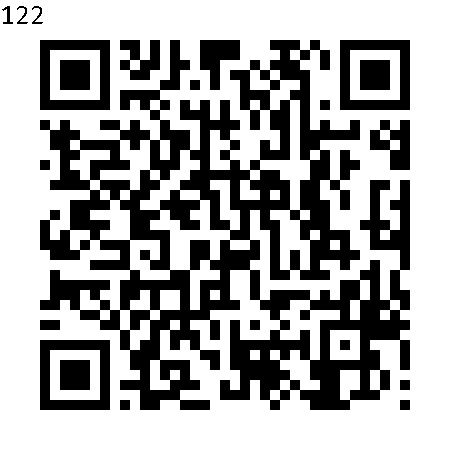

scpbooks.org/checkout/EnI11nuucqaQMSgWyE6wqZWU3QXMT4SklY6EJfBr6us


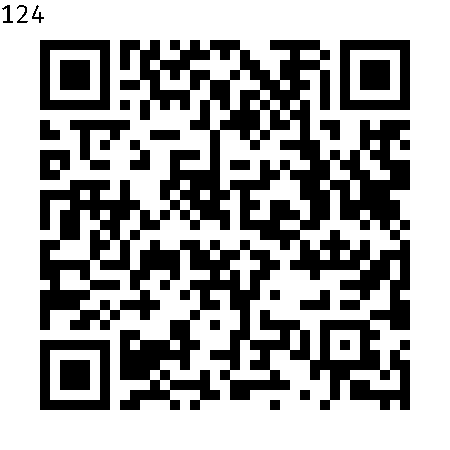

scpbooks.org/checkout/NJKxKLXr1nsyVFQ1-ZJ0wCDWk-kSB3w9_iW8l8Th9A0


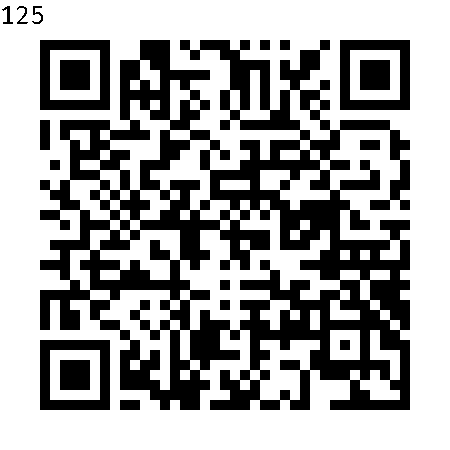

scpbooks.org/checkout/QvATlv2o4-wcW15Lp62H2PlYMO95zKvxXZdXLRwUUDY


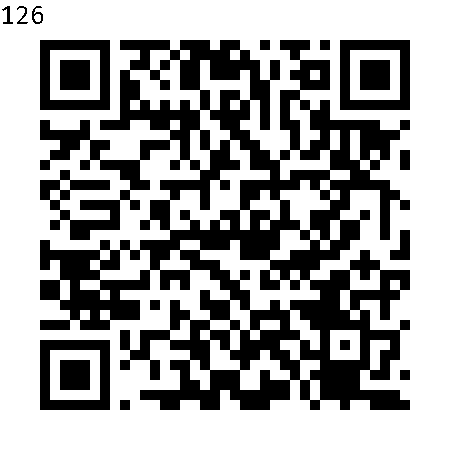

scpbooks.org/checkout/7nedF8JZclE55Uxxcv5zVi39hGNHtBP1OCeSV7EO_Ng


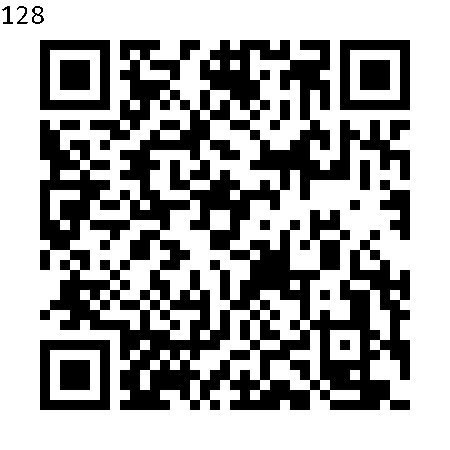

scpbooks.org/checkout/5M0MJMkoeartV6nIlvl6S_UBtjo_wsHX75oqUYLMYYQ


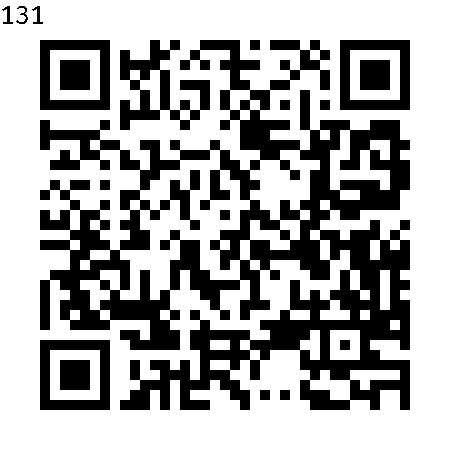

scpbooks.org/checkout/dePEJWEmo751wz5fYGBr_4u8G6MicYbfmOejMCdCR4o


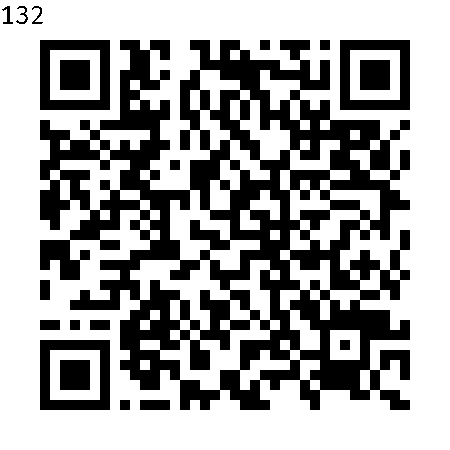

In [29]:
for i in range(len(imgs)):
    print(datas[i])
    display(imgs[i])
